In [5]:
## Incluir las siguientes librerias

import matplotlib.pyplot as plt
import ipywidgets as widgets
from control import * 

# Estabilidad de Sistemas en Control
**_Analizar la estabilidad en los sistemas a controlar._**

_Un sistema es estable si converge a un valor diferente de infinito_

La estabilidad puede ser verificada con diferentes métodos:

- Respuesta Temporal
- Matriz de Routh
- Polos y Ceros
- Mapa de polos y ceros
- Root Locus

Recomiendo verificar por todos los métodos el sistema para estar seguro de que se tiene un sistema estable. 

## Verificar Estabilidad en el Sistema masa-resorte-amortiguador 

Para verificar la estabilidad del sistema masa-resorte-amortiguador. Llevemos cada uno de los parametros del sistema a la zona de signos negativos. En el siguiente simulador. 

In [9]:
## Parametros del modelo

m = widgets.FloatSlider(value=1,min=-3,max=3,step=0.1,description='m')
c = widgets.FloatSlider(value=1,min=-3,max=3,step=0.1,description='c')
k = widgets.FloatSlider(value=1,min=-3,max=3,step=0.1,description='k')

## Definicion de la simulacion

def simulacion(m,c,k):
    sistema = tf([1],[m,c,k])
    tiempo, amplitud = step_response(sistema)
    plt.plot(tiempo,amplitud)
    plt.title('Simulación masa-resorte-amortiguador')
    plt.xlabel('tiempo (t)')
    plt.ylabel('amplitud')

## Presentación de los resultados    
    
plot_sistema = widgets.interactive_output(simulacion,{'m':m,'c':c,'k':k})      
widgets.HBox([widgets.VBox([m,c,k]),plot_sistema])

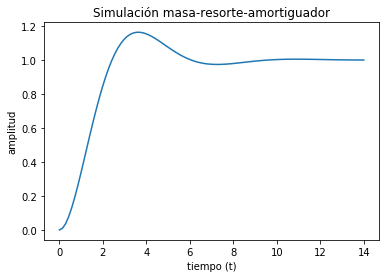

In [10]:
simulacion(1,1,1)

**¿Cómo los parámetros influyen en la estabilidad?**

|masa|resorte|amortiguador|| Estable |
|:---:|:----:|:----------:||:-------:|
|$+$|$+$|$+$|||
|$+$|$+$|$-$|||
|$+$|$-$|$+$|||
|$+$|$-$|$-$|||
|$-$|$+$|$+$|||
|$-$|$+$|$-$|||
|$-$|$-$|$+$|||
|$-$|$-$|$-$|||

_Si la respuesta temporal de un sistema diverge entonces se considera inestable._

## Matriz de _Routh_

Para verificar estabilidad con la matriz de _Routh_, primeramente se debe contruir, siguiendo los pasos descritos:

1. Sacar el polinomio carasteristico (lo que es igual al deominador de la funcion de transferencia).
    $$a\,s^3+b\,s^2+c\,s+d = 0$$
2. Ubicar los coefficientes del polinomio en las dos primeras filas de la tabla.
    $$
    \begin{array}{ccc}
    s^3 & a & c \\
    s^2 & b & d \\
    s^1 & \mathcal{R} &  \\
    s^0 && \\
    \end{array}
    $$
3. Completar las filas de la tabla hasta la fila $s^0$, siguiendo este cálculo como ejemplo a la tabla anterior:
    $$\mathcal{R} = (b\cdot c - a\cdot d)/b$$
    

### Matriz de Routh Aplicado al sistema masa-resorte-amortiguador

$$
\begin{array}{ccc}
s^2 & m & k  \\
s^1 & c &  \\
s^0 & k &  \\
\end{array}
$$

La estabilidad en la matriz de _Routh_ esta representada por los signos de la primer columna en la matriz. Si todos los elementos de dicha columna tienen el mismo signo, entonces el sistema es estable. 

## Polos y ceros

Otra forma de verificar la estabilidad del sistema es mirando los polos y los ceros de este. 

- **Cero** : valor de $s$ que hace cero el **numerador** de la función de transferencia.
- **Polo** : valor de $s$ que hace cero el **denominador** de la función de transferencia.

Todos los polos deben tener parte real negativa para que el sistema sea estable.

In [25]:
m = 1                 # Parametros
c = 2
k = 4
s = tf([1,0],1)       # Variable de Laplace
G = 1/(m*s**2+c*s+k)  # Funcion de transferencia

print("La funcion de transferencia es :")
print(G)
print("Los polos que posee son:\n")
print(pole(G))
print("\nLos ceros que posee son:\n")
print(zero(G))

La funcion de transferencia es :

      1
-------------
s^2 + 2 s + 4

Los polos que posee son:

[-1.+1.73205081j -1.-1.73205081j]

Los ceros que posee son:

[]


Se puede observar que la parte real de los polos es negativa por lo tanto el sistema es estable. 

## Mapa de Polos y Ceros

Este mapa es la represtación gráfica de estos valores en el plano complejo. 

- La parte real en el eje horizontal 
- La parte imaginaria en el eje vertical

De la función de transferencia anterior:

(array([-1.+1.73205081j, -1.-1.73205081j]), array([], dtype=float64))

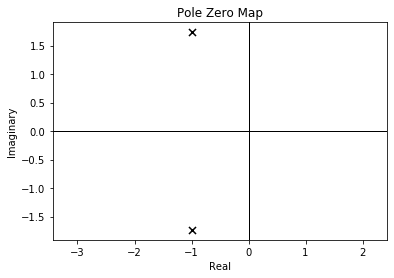

In [27]:
pzmap(G)

## Ejercicio 

Modelizar y análizar el siguiente sistema:

<img src="https://cpm.davinsony.com/media/svg/bose.svg" width="220px"/>

El sistema tiene tres entradas, la gravedad $g$, la fuerza manipulada $F_m$ y el perfil de la carretera $c$, y tiene cinco parámetros son:

$$
m=2500\text{kg}     \quad 
m_r=320\text{kg}    \quad
k_s=80000\text{N/m} \quad
k_r=500000\text{N/m}\quad
c_S=350\text{Ns/m}
$$